In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import load_datasets
from utils.model_utils import initialize_model
from utils.train_utils import train_model
from utils.metrics import evaluate_model
from utils.visualization import plot_training, plot_confusion_matrix

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



[INFO] Loading datasets...
[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: resnet18\n")
print("[INFO] Initializing ResNet18 model...")
model = initialize_model(
    model_name="convnext_tiny",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: resnet18

[INFO] Initializing ResNet18 model...


c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to C:\Users\Yash/.cache\torch\hub\checkpoints\convnext_tiny-983f1562.pth
100%|██████████| 109M/109M [00:09<00:00, 12.0MB/s] 


[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    num_epochs=num_epochs,
    device=device
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training...

Starting training...



Epoch [1/10]:
    Train Loss: 0.3816, Train Acc: 0.8368
    Val Loss:   0.3036, Val Acc:   0.8756
    Learning Rate: 0.001000



Epoch [2/10]:
    Train Loss: 0.2741, Train Acc: 0.8824
    Val Loss:   0.2698, Val Acc:   0.8980
    Learning Rate: 0.001000



Epoch [3/10]:
    Train Loss: 0.2404, Train Acc: 0.9051
    Val Loss:   0.2539, Val Acc:   0.9005
    Learning Rate: 0.001000



Epoch [4/10]:
    Train Loss: 0.2143, Train Acc: 0.9136
    Val Loss:   0.2373, Val Acc:   0.9104
    Learning Rate: 0.001000



Epoch [5/10]:
    Train Loss: 0.2058, Train Acc: 0.9221
    Val Loss:   0.2363, Val Acc:   0.9204
    Learning Rate: 0.001000



Epoch [6/10]:
    Train Loss: 0.1892, Train Acc: 0.9274
    Val Loss:   0.2295, Val Acc:   0.9179
    Learning Rate: 0.001000



Epoch [7/10]:
    Train Loss: 0.1819, Train Acc: 0.9338
    Val Loss:   0.2271, Val Acc:   0.9154
    Learning Rate: 0.001000



Epoch [8/10]:
    Train Loss: 0.1761, Train Acc: 0.9316
    Val Loss:   0.2307, Val Acc:   0.9129
    Learning Rate: 0.001000



Epoch [9/10]:
    Train Loss: 0.1781, Train Acc: 0.9279
    Val Loss:   0.2493, Val Acc:   0.9104
    Learning Rate: 0.001000



Epoch [10/10]:
    Train Loss: 0.1676, Train Acc: 0.9353
    Val Loss:   0.2128, Val Acc:   0.9229
    Learning Rate: 0.001000


Training complete!

[INFO] Training completed successfully!


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.9056603773584906, 'recall': 0.9056603773584906, 'f1-score': 0.9056603773584906, 'support': 159.0}, 'Fire': {'precision': 0.9402390438247012, 'recall': 0.9402390438247012, 'f1-score': 0.9402390438247012, 'support': 251.0}, 'accuracy': 0.926829268292683, 'macro avg': {'precision': 0.9229497105915959, 'recall': 0.9229497105915959, 'f1-score': 0.9229497105915959, 'support': 410.0}, 'weighted avg': {'precision': 0.926829268292683, 'recall': 0.926829268292683, 'f1-score': 0.926829268292683, 'support': 410.0}}, 'confusion_matrix': array([[144,  15],
       [ 15, 236]]), 'roc_auc': np.float64(0.9229497105915959)}


[INFO] Saving training and evaluation results...


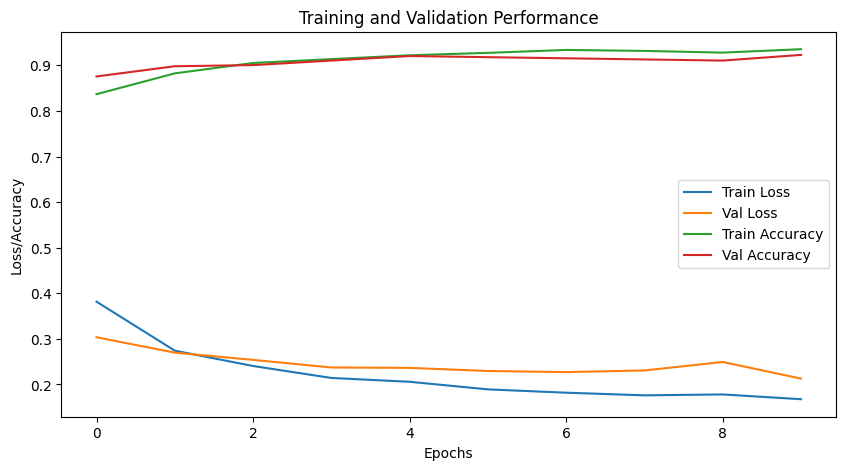

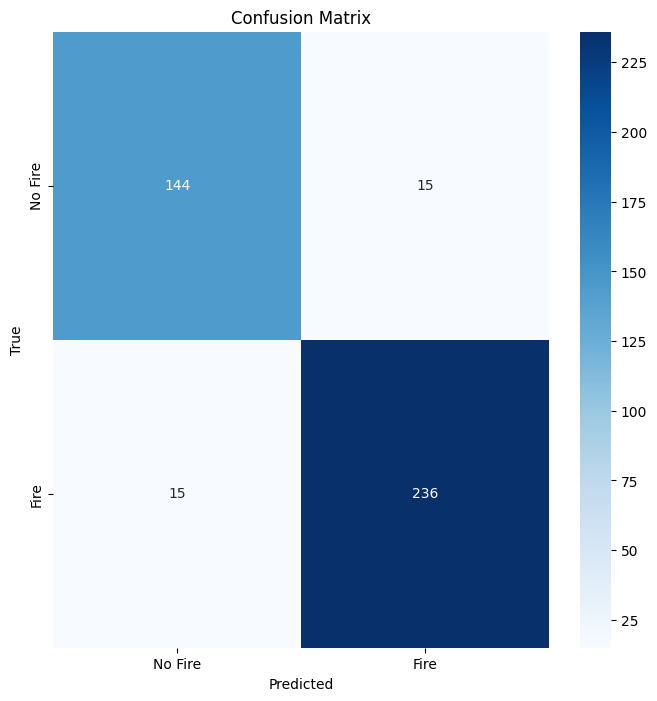

[INFO] Results saved successfully!


In [10]:
print("[INFO] Saving training and evaluation results...")
plot_training(history, "outputs/resnet18_baseline_training_curve.png")
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path="outputs/resnet18_baseline_confusion_matrix.png"
)
print("[INFO] Results saved successfully!")